<p align="center">
  <img src="https://media.istockphoto.com/id/1135912032/photo/respiratory-system.jpg?s=2048x2048&w=is&k=20&c=9vBNs47uX_gaY32HKTzgO4t2I-gaYIV3LA7xZAtM1CA=" style="width:100%; max-width:900px; height:180px; object-fit:cover; border-radius:10px;"/>
</p>
<div style="text-align:center;">
  <h1 style="color:Gray; display:inline-block; margin:0;; size:2.5em">Lung Life</h1><br>
  <h1 style="color:Gray; display:inline-block; margin:0;">Aplicacion movil para diagnostico temprano de cancer pulmonar</h1>
  <p>
    <b>LungLife | Machine Learning | CRISP-DM</b><br>
    <span style="font-size:1.1em;">Análisis y predicción de la salud pulmonar utilizando machine learning.</span>
  </p>
</div>

# FASE 2: Comprensión de Datos (CRISP-DM)

## Propósito de la Fase de Comprensión de Datos

En esta segunda fase del proceso CRISP-DM, nos centramos en explorar y comprender los datos recopilados. Esto incluye la evaluación de la calidad de los datos, la identificación de patrones y relaciones significativas, y la generación de insights preliminares que guiarán las etapas posteriores del proyecto. El objetivo es asegurar que los datos sean adecuados para el análisis y el modelado futuros.

## 01.- Dataset Lung Cancer Structured Clinical Dataset

A Comprehensive Lung Cancer Structured Clinical Dataset:

Lung cancer is a type of cancer that begins in the lungs, often associated with smoking but also linked to factors like air pollution, genetic predisposition, and exposure to toxins such as asbestos and radon. It is one of the leading causes of cancer-related deaths globally, as it is often diagnosed in advanced stages.

There are two main types: Non-Small Cell Lung Cancer (NSCLC), the most common form, and Small Cell Lung Cancer (SCLC), which is more aggressive but less common.

Symptoms include persistent cough, shortness of breath, chest pain, and unexplained weight loss.

Early detection through screenings such as low-dose CT scans significantly improves outcomes.
Treatment options include surgery, chemotherapy, radiation, immunotherapy, and targeted therapies, tailored to the cancer's type and stage.

Preventive measures like avoiding smoking and reducing exposure to environmental risk factors are key to reducing lung cancer incidence.

Dataset Link:
https://www.kaggle.com/arifcuet14

https://www.kaggle.com/datasets/arifcuet14/lung-cancer-structured-clinical-dataset


In [2]:
# Verifica si las librerías necesarias ya están instaladas
try:
    # Ignorar warnings
    import warnings
    warnings.filterwarnings('ignore')
    # Librerías del sistema
    import sys, subprocess
    # Importaciones base
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os as os  
    from os import path
    import joblib
    import scipy.stats as stats
    import pickle as pkl

    print("Dependencias ya instaladas.")

except ImportError:

    print("Dependencias no encontradas. Instalando ahora...")
    
    # Se ejecutan los comandos de instalación
    %pip install --quiet matplotlib
    %pip install --quiet seaborn
    %pip install --quiet joblib
    %pip install --quiet scipy
    
    print("Instalación completada.")

Dependencias ya instaladas.


In [3]:
# Cargar datasets 
df = pd.read_csv('../data/raw/lung-cancer-structured-clinical-dataset/lung_cancer_data.csv')  # Ejemplo de carga de dataset
print("Dataset cargado exitosamente.")

Dataset cargado exitosamente.


Aquí tienes la tabla completa con las 30 columnas en formato Markdown:

| Columna | Descripción |
|---------|-------------|
| Patient_ID | Identificador único para cada paciente |
| Age | Edad del paciente |
| Gender | Género del paciente |
| Smoking_History | Historial de tabaquismo del paciente |
| Years_Smoked | Número de años que el paciente ha fumado |
| Pack_Years | Medida calculada de exposición al tabaco (paquetes por día × años fumando) |
| Family_History_Cancer | Antecedentes familiares de cáncer |
| Occupation | Ocupación o profesión del paciente |
| Exposure_to_Toxins | Exposición a sustancias tóxicas en el ambiente laboral o personal |
| Residential_Area | Zona o área de residencia del paciente |
| BMI | Índice de Masa Corporal |
| Lung_Function_Test_Result | Resultados de pruebas de función pulmonar |
| Chest_Pain_Symptoms | Presencia de síntomas de dolor torácico |
| Shortness_of_Breath | Presencia de dificultad para respirar |
| Chronic_Cough | Presencia de tos crónica |
| Weight_Loss | Pérdida de peso significativa |
| Physical_Activity_Level | Nivel de actividad física del paciente |
| Dietary_Habits | Hábitos alimenticios y patrones dietéticos |
| Air_Quality_Index | Índice de calidad del aire en la zona de residencia |
| Comorbidities | Otras condiciones médicas coexistentes |
| Previous_Cancer_Diagnosis | Diagnósticos previos de cáncer |
| Tumor_Size_cm | Tamaño del tumor en centímetros |
| Metastasis_Status | Estado de metástasis (diseminación del cáncer) |
| Stage_of_Cancer | Etapa o estadio del cáncer |
| Treatment_Type | Tipo de tratamiento recibido |
| Survival_Years | Número de años de supervivencia después del diagnóstico |
| Follow_Up_Visits | Número de visitas de seguimiento médico |
| Medication_Response | Respuesta a la medicación o tratamiento |
| Symptom_Progression | Progresión o evolución de los síntomas |
| Year_of_Diagnosis | Año en que se realizó el diagnóstico |

In [ ]:
# Agrupación por dominio semántico
feature_domains = {
    'patient_identification': [
        'Patient_ID'
    ],
    'demographics': [
        'Age', 'Gender', 'Occupation', 'Residential_Area'
    ],
    'lifestyle_factors': [
        'Smoking_History', 'Years_Smoked', 'Pack_Years',
        'Physical_Activity_Level', 'Dietary_Habits'
    ],
    'environmental_exposure': [
        'Exposure_to_Toxins', 'Air_Quality_Index'
    ],
    'medical_history': [
        'Family_History_Cancer', 'Comorbidities', 
        'Previous_Cancer_Diagnosis'
    ],
    'clinical_symptoms': [
        'Chest_Pain_Symptoms', 'Shortness_of_Breath', 
        'Chronic_Cough', 'Weight_Loss'
    ],
    'clinical_measurements': [
        'BMI', 'Lung_Function_Test_Result'
    ],
    'cancer_characteristics': [
        'Tumor_Size_cm', 'Metastasis_Status', 
        'Stage_of_Cancer', 'Year_of_Diagnosis'
    ],
    'treatment_outcomes': [
        'Treatment_Type', 'Medication_Response', 
        'Symptom_Progression', 'Follow_Up_Visits'
    ],
    'survival_metrics': [
        'Survival_Years'
    ]
}

# Crear lista ordenada desde los grupos
ordered_columns = []
for domain in feature_domains.values():
    ordered_columns.extend(domain)

df = df[ordered_columns]

In [ ]:
df.columns.tolist()

['Patient_ID',
 'Age',
 'Gender',
 'Smoking_History',
 'Years_Smoked',
 'Pack_Years',
 'Family_History_Cancer',
 'Occupation',
 'Exposure_to_Toxins',
 'Residential_Area',
 'BMI',
 'Lung_Function_Test_Result',
 'Chest_Pain_Symptoms',
 'Shortness_of_Breath',
 'Chronic_Cough',
 'Weight_Loss',
 'Physical_Activity_Level',
 'Dietary_Habits',
 'Air_Quality_Index',
 'Comorbidities',
 'Previous_Cancer_Diagnosis',
 'Tumor_Size_cm',
 'Metastasis_Status',
 'Stage_of_Cancer',
 'Treatment_Type',
 'Survival_Years',
 'Follow_Up_Visits',
 'Medication_Response',
 'Symptom_Progression',
 'Year_of_Diagnosis']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Patient_ID                 300000 non-null  int64  
 1   Age                        300000 non-null  int64  
 2   Gender                     300000 non-null  object 
 3   Smoking_History            300000 non-null  object 
 4   Years_Smoked               300000 non-null  int64  
 5   Pack_Years                 300000 non-null  int64  
 6   Family_History_Cancer      300000 non-null  bool   
 7   Occupation                 300000 non-null  object 
 8   Exposure_to_Toxins         300000 non-null  bool   
 9   Residential_Area           300000 non-null  object 
 10  BMI                        300000 non-null  float64
 11  Lung_Function_Test_Result  300000 non-null  float64
 12  Chest_Pain_Symptoms        300000 non-null  bool   
 13  Shortness_of_Breath        30

## 2.-Dataset Lung Cancer Dataset
### Data about lung cancer focused on individuals diagnosed with cancer.
### About Dataset

This dataset contains data about lung cancer Mortality and is a comprehensive collection of patient
information, specifically focused on individuals diagnosed with cancer.
Description of columns:

* id: A unique identifier for each patient in the dataset.
* age: The age of the patient at the time of diagnosis.
* gender: The gender of the patient (e.g., male, female).
* country: The country or region where the patient resides.
* diagnosis_date: The date on which the patient was diagnosed with lung cancer.
* cancer_stage: The stage of lung cancer at the time of diagnosis (e.g., Stage I, Stage II,
    Stage III, Stage IV).
* family_history: Indicates whether there is a family history of cancer (e.g., yes, no).
* smoking_status: The smoking status of the patient (e.g., current smoker, former smoker,
    never smoked, passive smoker).
* bmi: The Body Mass Index of the patient at the time of diagnosis.
* cholesterol_level: The cholesterol level of the patient (value).
* hypertension: Indicates whether the patient has hypertension (high blood pressure) (e.g.,
  yes, no).
* asthma: Indicates whether the patient has asthma (e.g., yes, no).
* cirrhosis: Indicates whether the patient has cirrhosis of the liver (e.g., yes, no).
* other_cancer: Indicates whether the patient has had any other type of cancer in addition to
  the primary diagnosis (e.g., yes, no).
* treatment_type: The type of treatment the patient received (e.g., surgery, chemotherapy,
  radiation, combined).
* end_treatment_date: The date on which the patient completed their cancer treatment or died.
* survived: Indicates whether the patient survived (e.g., yes, no).

## About this file

This dataset was assembled for educational purposes and may include synthetic or simulated data to reflect patterns seen in lung cancer diagnosis and treatment.
It was inspired by various healthcare-related learning resources and is not intended to represent real patient data.
This dataset is suitable for machine learning modeling, analysis, and educational projects — not for clinical or diagnostic use.
For real-world datasets, users are encouraged to explore verified sources like:

* SEER (https://seer.cancer.gov/)
* TCGA (https://portal.gdc.cancer.gov/)
* MIMIC-IV (https://physionet.org/)
* File Information

Daset Link:
https://www.kaggle.com/khwaishsaxena

https://www.kaggle.com/datasets/khwaishsaxena/lung-cancer-dataset



A single CSV file containing 890000 rows and 17 columns of patient data.

In [ ]:
df

,Patient_ID,Age,Gender,Smoking_History,Years_Smoked,Pack_Years,Family_History_Cancer,Occupation,Exposure_to_Toxins,Residential_Area,...,Previous_Cancer_Diagnosis,Tumor_Size_cm,Metastasis_Status,Stage_of_Cancer,Treatment_Type,Survival_Years,Follow_Up_Visits,Medication_Response,Symptom_Progression,Year_of_Diagnosis
0,1,69,Male,Never,30,3,False,Farmer,False,Urban,...,True,11.02,True,III,Surgery,12,24,Good,Stable,2007
1,2,32,Female,Former,6,61,False,Office Worker,False,Urban,...,False,14.29,True,II,Chemotherapy,6,12,Poor,Stable,2009
2,3,89,Male,Never,2,9,True,Office Worker,True,Rural,...,False,9.47,False,III,Chemotherapy,6,15,Good,Worsening,2015
3,4,78,Female,Never,11,69,False,Factory Worker,True,Urban,...,False,2.22,False,IV,Chemotherapy,13,25,Moderate,Improving,2012
4,5,38,Male,Former,11,57,False,Farmer,False,Rural,...,False,8.26,False,III,Palliative,3,4,Good,Stable,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,299996,64,Male,Current,45,47,False,Office Worker,True,Urban,...,False,10.80,False,IV,Chemotherapy,19,24,Good,Worsening,2015
299996,299997,46,Other,Never,12,70,True,Factory Worker,False,Urban,...,False,6.15,False,III,Chemotherapy,13,49,Good,Worsening,2013
299997,299998,44,Female,Never,1,23,False,Factory Worker,False,Urban,...,False,0.81,False,IV,Chemotherapy,7,0,Good,Improving,2024
299998,299999,65,Female,Current,37,7,True,Office Worker,True,Suburban,...,False,13.18,True,III,Surgery,8,13,Poor,Improving,2003


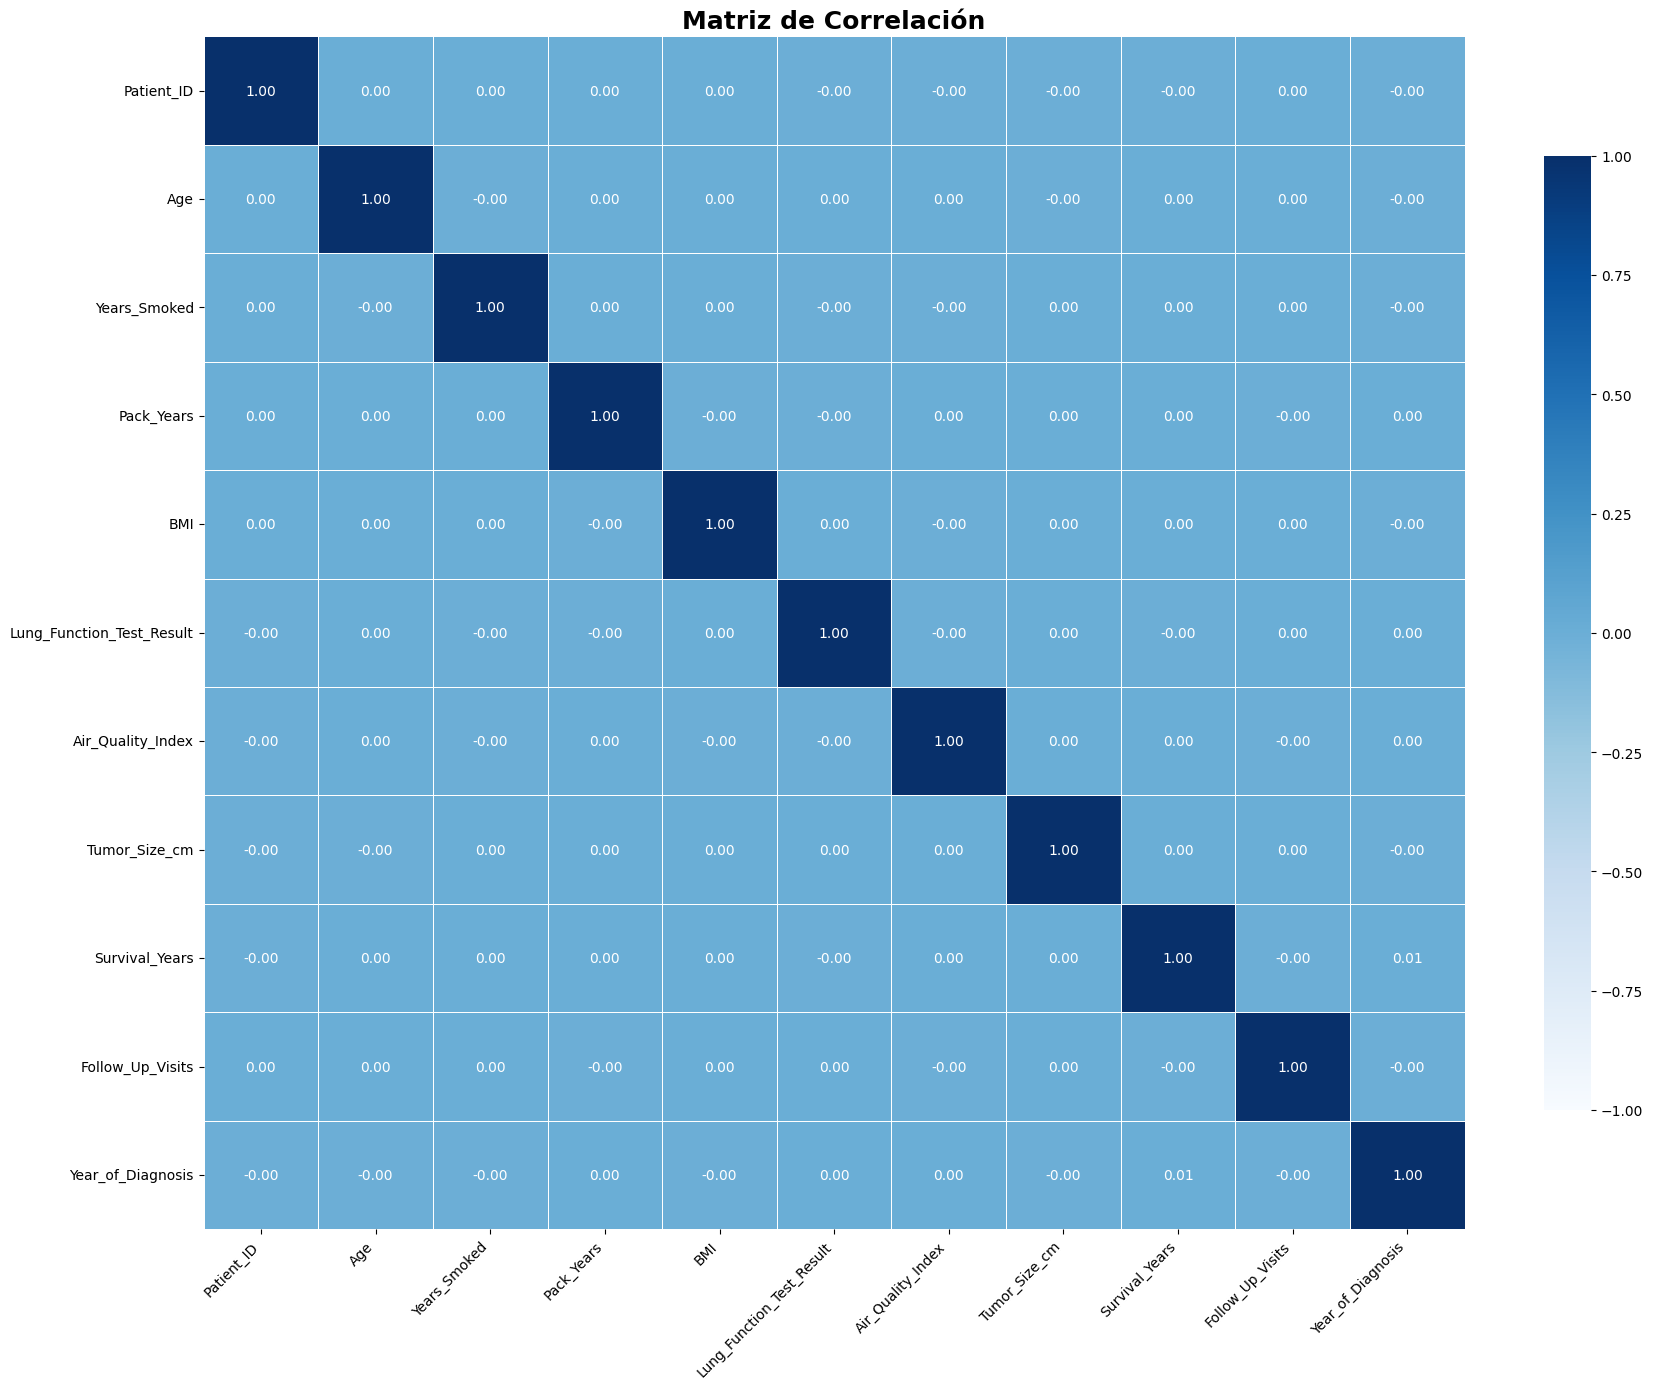

In [ ]:
# Crear heatmap de correlación solo con variables numéricas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas y rellenar valores faltantes
numeric_cols_for_corr = df.select_dtypes(include=[np.number]).columns
df_prep_for_corr = df[numeric_cols_for_corr].copy()
# Calcular la matriz de correlación
corr = df_prep_for_corr.corr()

plt.figure(figsize=(18, 14))
#sns.heatmap(corr, annot=True,cmap='Blues',fmt=".3f",mask=mask,linewidths=.5,cbar_kws={"shrink": .8},vmin=-1,vmax=1)
sns.heatmap(corr, annot=True,cmap='Blues',fmt=".2f",linewidths=.5,cbar_kws={"shrink": .8},vmin=-1,vmax=1)
plt.title("Matriz de Correlación", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Columnas categóricas encontradas: ['Gender', 'Smoking_History', 'Occupation', 'Residential_Area', 'Physical_Activity_Level', 'Dietary_Habits', 'Comorbidities', 'Stage_of_Cancer', 'Treatment_Type', 'Medication_Response', 'Symptom_Progression']


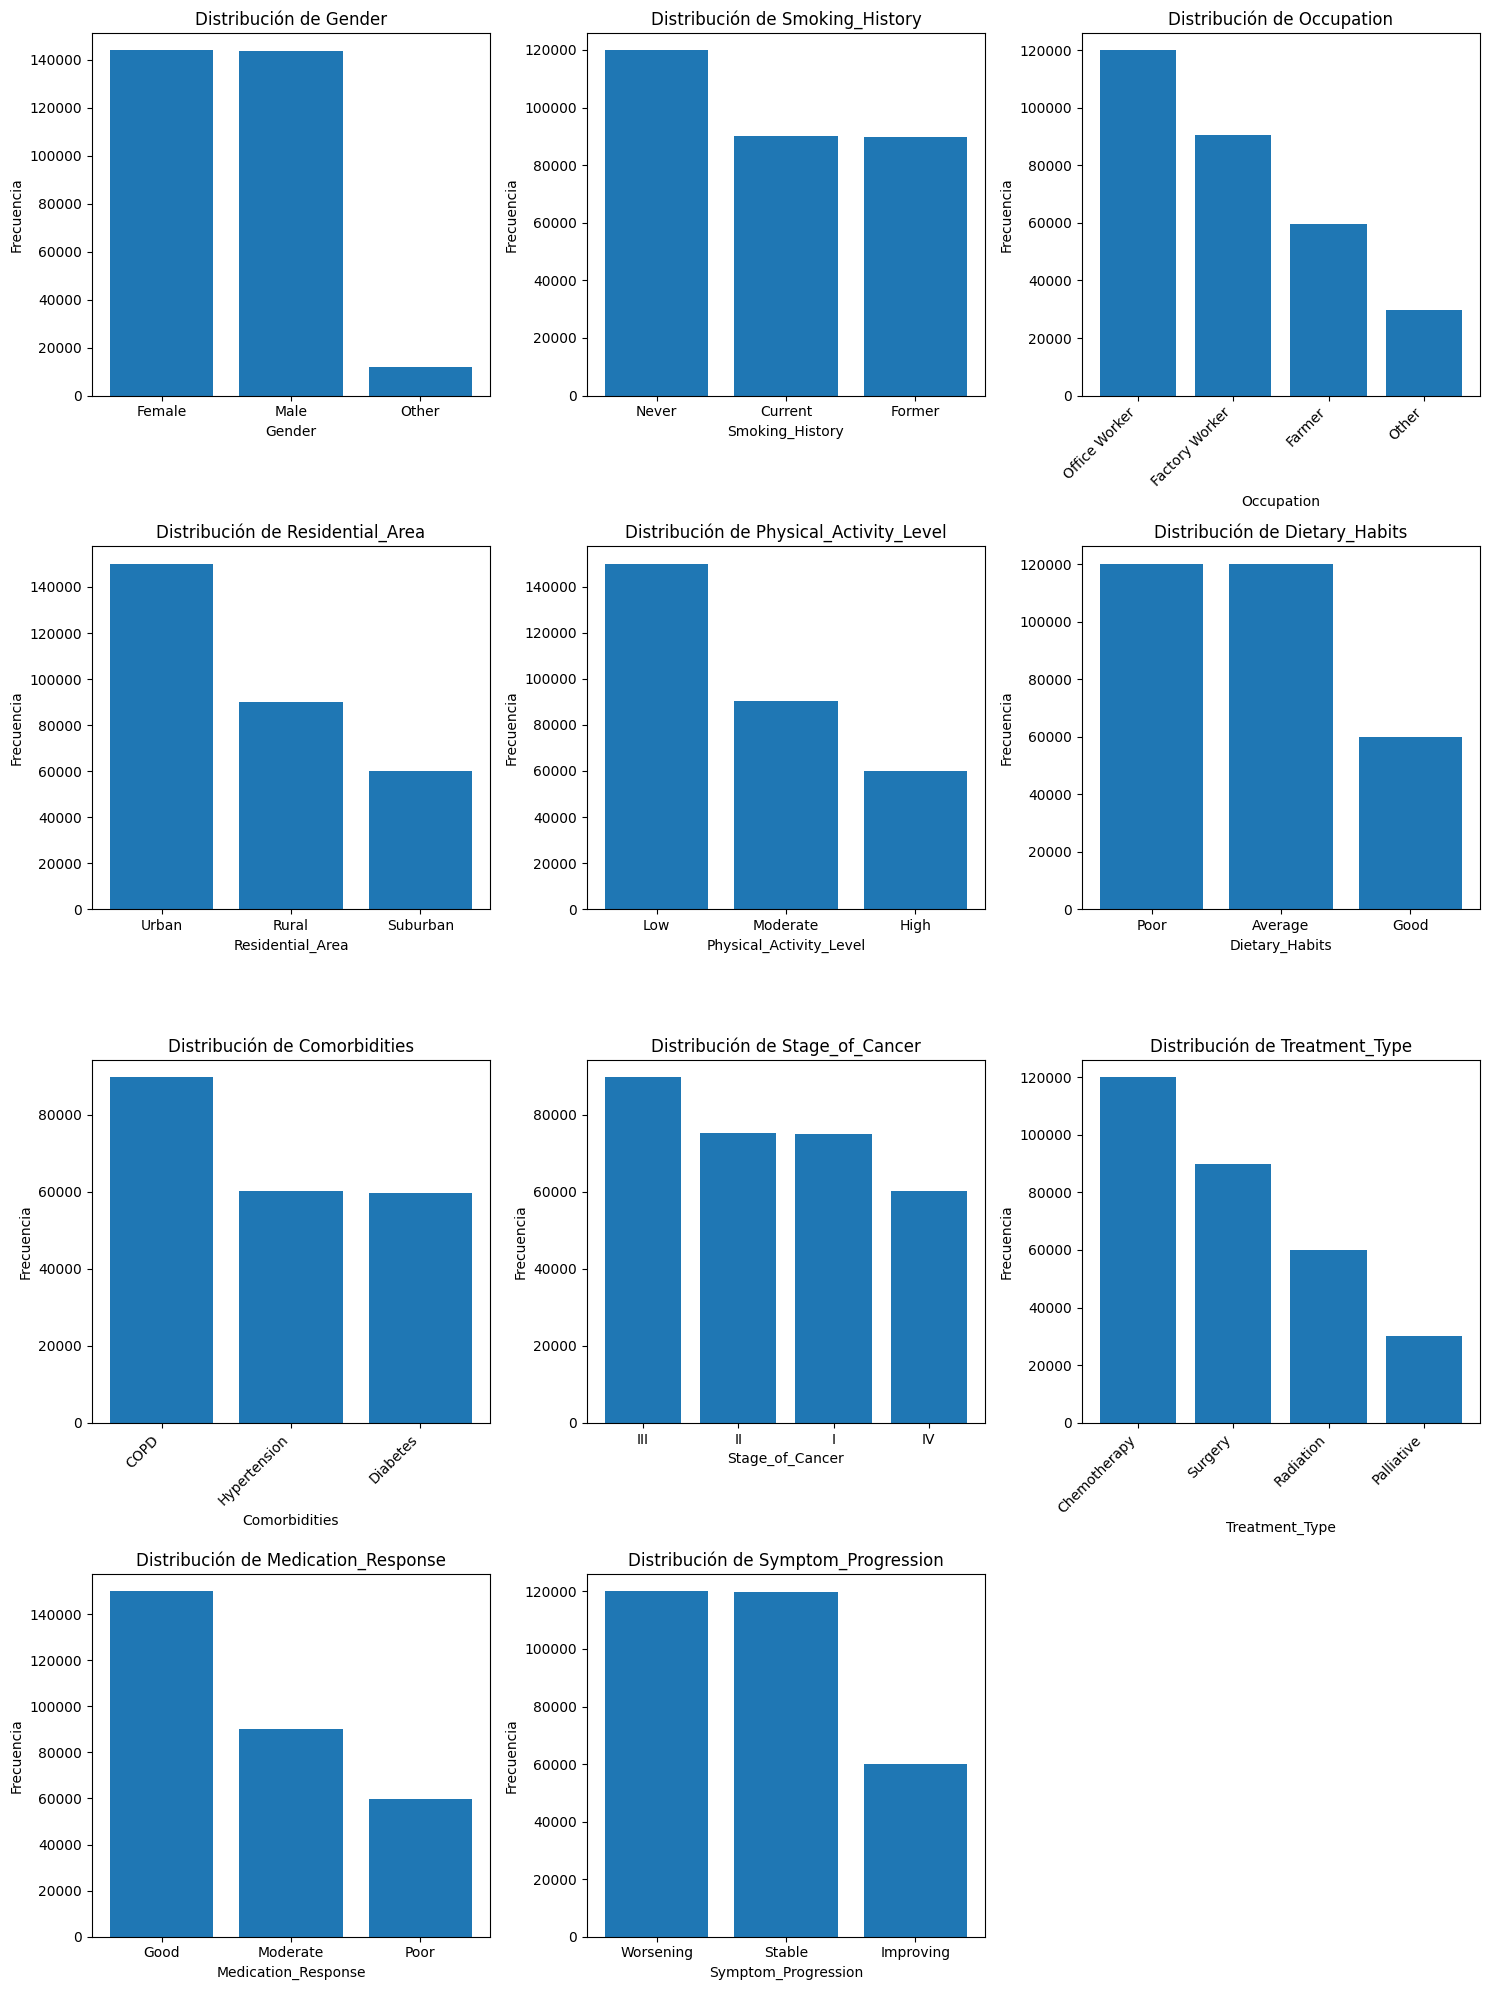


Resumen de variables categóricas:
Gender: 3 valores únicos
  Valores: ['Male', 'Female', 'Other']

Smoking_History: 3 valores únicos
  Valores: ['Never', 'Former', 'Current']

Occupation: 4 valores únicos
  Valores: ['Farmer', 'Office Worker', 'Factory Worker', 'Other']

Residential_Area: 3 valores únicos
  Valores: ['Urban', 'Rural', 'Suburban']

Physical_Activity_Level: 3 valores únicos
  Valores: ['Moderate', 'Low', 'High']

Dietary_Habits: 3 valores únicos
  Valores: ['Poor', 'Good', 'Average']

Comorbidities: 3 valores únicos
  Valores: [nan, 'COPD', 'Diabetes', 'Hypertension']

Stage_of_Cancer: 4 valores únicos
  Valores: ['III', 'II', 'IV', 'I']

Treatment_Type: 4 valores únicos
  Valores: ['Surgery', 'Chemotherapy', 'Palliative', 'Radiation']

Medication_Response: 3 valores únicos
  Valores: ['Good', 'Poor', 'Moderate']

Symptom_Progression: 3 valores únicos
  Valores: ['Stable', 'Worsening', 'Improving']

Symptom_Progression: 3 valores únicos
  Valores: ['Stable', 'Worsening'

In [ ]:
# Análisis de variables categóricas
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Crear visualizaciones para variables categóricas importantes
if len(categorical_columns) > 0:
    # Determinar el número de subplots necesarios
    n_cols = min(3, len(categorical_columns))
    n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    if n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(categorical_columns[:n_rows*n_cols]):
        if i < len(axes):
            # Contar valores únicos
            value_counts = df[col].value_counts()
            
            # Crear gráfico de barras
            axes[i].bar(range(len(value_counts)), value_counts.values)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')
            
            # Rotar etiquetas si son muchas o muy largas
            if len(value_counts) > 5 or any(len(str(label)) > 10 for label in value_counts.index):
                axes[i].set_xticks(range(len(value_counts)))
                axes[i].set_xticklabels(value_counts.index, rotation=45, ha='right')
            else:
                axes[i].set_xticks(range(len(value_counts)))
                axes[i].set_xticklabels(value_counts.index)
    
    # Ocultar ejes vacíos
    for i in range(len(categorical_columns), len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Resumen de valores únicos por columna categórica
print("\nResumen de variables categóricas:")
for col in categorical_columns:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} valores únicos")
    if unique_count <= 10:  # Mostrar valores únicos si son pocos
        print(f"  Valores: {df[col].unique().tolist()}")
    print()

In [ ]:
# Análisis de calidad de datos
print("=== ANÁLISIS DE CALIDAD DE DATOS ===\n")

# 1. Dimensiones del dataset
print(f"1. DIMENSIONES DEL DATASET:")
print(f"   - Filas: {df.shape[0]:,}")
print(f"   - Columnas: {df.shape[1]}")
print()

# 2. Valores faltantes
print("2. VALORES FALTANTES:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Faltantes': missing_data.values,
    'Porcentaje': missing_percentage.values
}).round(2)

# Mostrar solo columnas con valores faltantes
columns_with_missing = missing_summary[missing_summary['Valores_Faltantes'] > 0]
if len(columns_with_missing) > 0:
    print(columns_with_missing.to_string(index=False))
else:
    print("   No se encontraron valores faltantes en el dataset.")
print()

# 3. Duplicados
print("3. REGISTROS DUPLICADOS:")
duplicates = df.duplicated().sum()
print(f"   - Total de duplicados: {duplicates:,}")
print(f"   - Porcentaje: {(duplicates/len(df)*100):.2f}%")
print()

# 4. Estadísticas descriptivas para variables numéricas
print("4. ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:")
if len(numeric_columns) > 0:
    print(df[numeric_columns].describe().round(2))
else:
    print("   No hay variables numéricas en el dataset.")
print()

# 5. Distribución de variables categóricas clave
print("5. DISTRIBUCIÓN DE VARIABLES CATEGÓRICAS PRINCIPALES:")
key_categorical = ['Gender', 'Smoking_History', 'Stage_of_Cancer', 'Treatment_Type']
for col in key_categorical:
    if col in df.columns:
        print(f"\n   {col}:")
        value_counts = df[col].value_counts()
        for value, count in value_counts.items():
            percentage = (count / len(df)) * 100
            print(f"     - {value}: {count:,} ({percentage:.1f}%)")

# 6. Resumen de tipos de datos
print(f"\n6. RESUMEN DE TIPOS DE DATOS:")
data_types_summary = df.dtypes.value_counts()
for dtype, count in data_types_summary.items():
    print(f"   - {dtype}: {count} columnas")
print()

print("=== FIN DEL ANÁLISIS DE CALIDAD ===")


=== ANÁLISIS DE CALIDAD DE DATOS ===

1. DIMENSIONES DEL DATASET:
   - Filas: 300,000
   - Columnas: 30

2. VALORES FALTANTES:
      Columna  Valores_Faltantes  Porcentaje
Comorbidities              90376       30.13

3. REGISTROS DUPLICADOS:
   - Total de duplicados: 0
   - Porcentaje: 0.00%

4. ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS:
       Patient_ID        Age  Years_Smoked  Pack_Years        BMI  \
count   300000.00  300000.00     300000.00   300000.00  300000.00   
mean    150000.50      53.45         24.51       39.53      28.01   
std      86602.68      20.78         14.43       23.09       6.93   
min          1.00      18.00          0.00        0.00      16.00   
25%      75000.75      35.00         12.00       20.00      22.00   
50%     150000.50      53.00         25.00       40.00      28.00   
75%     225000.25      71.00         37.00       59.00      34.00   
max     300000.00      89.00         49.00       79.00      40.00   

       Lung_Function_Test_Resul

In [ ]:
# Define el nombre del archivo
dataunderstanding = 'dataunderstand_lungcancer.parquet'

# Guarda el DataFrame  en formato Parquet
try:
    df.to_parquet(dataunderstanding, index=False) 
    print(f"DataFrame guardado exitosamente como '{dataunderstanding}'")
except Exception as e:
    print(f"Error al guardar como Parquet: {e}")